Stock_price_prediction(Minor Project)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r'C:\Users\deepe\OneDrive\Desktop\corizo project major and minor\minor project\stock_price_prediction.csv')
print('shape is = {}'.format(data.shape))
print(data.head())

shape is = (1009, 7)
         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  


In [ ]:

# Extract the closing prices
closing_prices = data['Close'].values.reshape(-1, 1)

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_prices = scaler.fit_transform(closing_prices)



In [ ]:
# Create input and target variables
X = normalized_prices[:-1]  # Use previous prices as input
y = normalized_prices[1:]   # Predict the next price

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [ ]:
# Inverse transform the predictions to get actual prices
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

In [ ]:

# Inverse transform the actual prices
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:

# Calculate the root mean squared error
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

In [ ]:
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train RMSE: 10.4651
Test RMSE: 13.0304


In [ ]:
# Print the predicted and actual prices
print('Predicted prices:')
print(test_predictions.flatten())
print('Actual prices:')
print(y_test.flatten())

Predicted prices:
[548.84788171 508.44539239 508.32618671 505.11742243 509.83617736
 505.11742243 506.08104285 508.54474056 512.9853085  508.65400209
 502.76301705 495.70971425 499.15688989 503.41867861 486.38149572
 494.71629216 484.68275289 486.35169505 493.01754833 488.61669543
 485.97418969 487.38486197 501.26296956 497.50783605 502.48485985
 500.93512338 501.94840299 503.43853612 502.39545584 498.68998052
 498.84893103 489.10346331 494.37853163 494.29907177 492.04401455
 485.50728031 486.95766762 488.44780076 499.49468023 491.55721687
 492.06387207 497.95485711 500.36886584 496.62367548 508.36593154
 512.26012925 517.54514271 526.49588468 532.41670219 532.88358177
 527.62840077 532.9232968  533.3604045  540.97005248 535.32742196
 530.16161518 535.34724868 536.66851794 540.01634542 547.23854289
 542.27143244 529.71456331 531.67163563 530.44968573 513.14428981
 511.29650883 514.91254934 515.98546208 518.38952665 518.77697617
 513.76020654 517.05837483 514.65431026 510.35277572 516.8

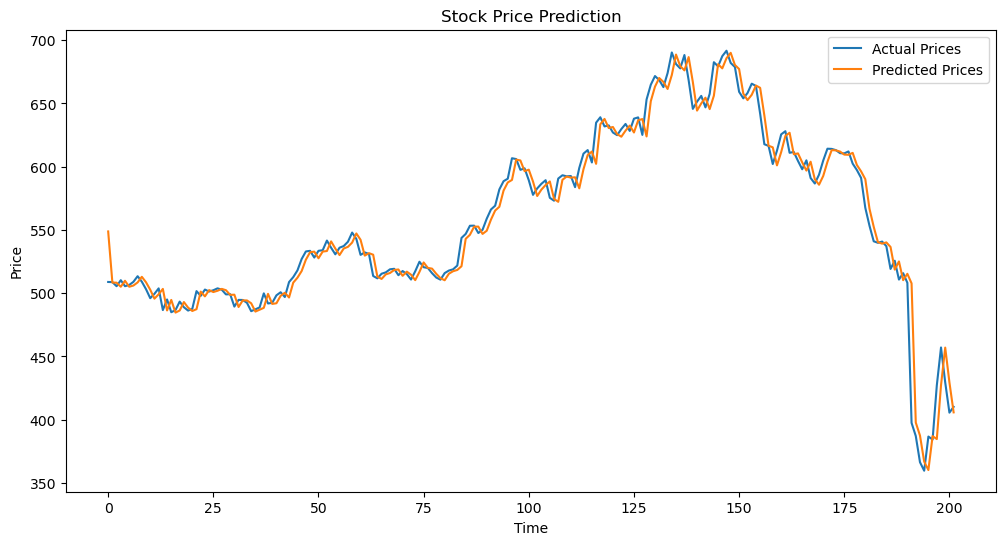

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(test_predictions, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()